In [24]:
import matplotlib.pyplot as plt

In [25]:
from copy import copy
from pathlib import Path
from sys import path

from ruckig import InputParameter, OutputParameter, Result, Ruckig

In [30]:
if __name__ == '__main__':
    # Create instances: the Ruckig OTG as well as input and output parameters
    otg = Ruckig(3, 0.01)  # DoFs, control cycle
    inp = InputParameter(3)
    out = OutputParameter(3)

    # Set input parameters
    inp.current_position = [0.0, 0.0, 0.5]
    inp.current_velocity = [0.0, -2.2, -0.5]
    inp.current_acceleration = [0.0, 2.5, -0.5]

    inp.target_position = [5.0, -2.0, -3.5]
    inp.target_velocity = [0.0, -0.5, -2.0]
    inp.target_acceleration = [0.0, 0.0, 0.5]
    inp.minimum_duration = 5.0
    
    inp.max_velocity = [3.0, 1.0, 3.0]
    inp.max_acceleration = [3.0, 2.0, 1.0]
    inp.max_jerk = [4.0, 3.0, 2.0]

    print('\t'.join(['t'] + [str(i) for i in range(otg.degrees_of_freedom)]))

    # Generate the trajectory within the control loop
    first_output, out_list = None, []
    res = Result.Working
    while res == Result.Working:
        res = otg.update(inp, out)

        #print('\t'.join([f'{out.time:0.3f}'] + [f'{p:0.3f}' for p in out.new_position]))
        out_list.append(copy(out))

        out.pass_to_input(inp)

        if not first_output:
            first_output = copy(out)

    print(f'Calculation duration: {first_output.calculation_duration:0.1f} [µs]')
    print(f'Trajectory duration: {first_output.trajectory.duration:0.4f} [s]')

    # Plot the trajectory
    # path.insert(0, str(Path(__file__).parent.absolute().parent / 'test'))
    # from plotter import Plotter

    # Plotter.plot_trajectory(Path(__file__).parent.absolute() / '1_trajectory.pdf', otg, inp, out_list, plot_jerk=False)

t	0	1	2
Calculation duration: 31.7 [µs]
Trajectory duration: 5.0000 [s]


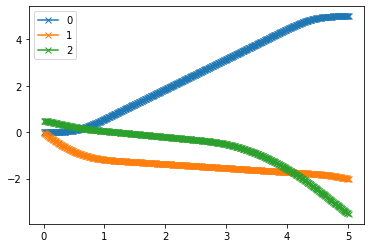

In [31]:
fig = plt.figure()
plt.plot([o.time for o in out_list], [o.new_position[0] for o in out_list], 'x-', label='0')
plt.plot([o.time for o in out_list], [o.new_position[1] for o in out_list], 'x-', label='1')
plt.plot([o.time for o in out_list], [o.new_position[2] for o in out_list], 'x-', label='2')
plt.legend()